# Kuis 2 Machine Learning
### Nama: Maidy Putri Joshi
### NIM: 2141720060
### Kelas: TI-3F / 18


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

Load Dataset

Load MNIST

In [3]:
from tensorflow.keras.datasets import mnist

In [18]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [19]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

**Penjelasan**

- Data pelatihan terdiri dari 60.000 gambar dengan resolusi 28x28 piksel
- Data uji memiliki 10.000 gambar dengan resolusi 28x28 piksel

In [20]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

**Penjelasan**

- (train_labels) terdiri dari 60,000 label yang sesuai dengan setiap sampel pada train_data
- (test_labels) terdiri dari 10,000 label yang sesuai dengan setiap sampel pada test_data

In [21]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

**Penjelasan**

output diatas menunjukkan bahwa 1 sampel data pelatihan pertama adalah gambar berukuran 28x28 piksel

In [22]:
# Check the label
train_labels.shape

(60000,)

**Penjelasan**

output diatas menunjukkan bahwa label pelatihan terdiri dari 60.000 elemen, masing-masing merepresentasikan digit yang sesuai dengan gambar tulisan tangan.

# **Combine Train and Test Data**

In [23]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [24]:
# Check data shape
digits_data.shape

(70000, 28, 28)

Penjelasan
**bold text**
output diatas merupakan data gabungan yang memiliki 70.000 sampel dengan dimensi gambar 28x28 piksel

In [25]:
# Check label shape
digits_labels.shape

(70000,)

**Penjelasan**

Label gabungan memiliki 70,000 elemen, masing-masing merepresentasikan digit yang sesuai dengan gambar tulisan tangan

Text(0.5, 1.0, 'Class: 6')

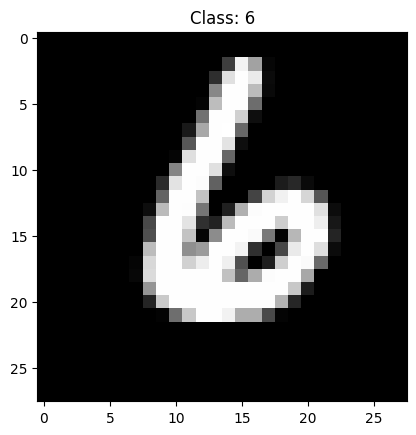

In [26]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

**Penjelasan**

Program akan memilih secara acak satu sampel dari data gabungan dan menampilkannya menggunakan Matplotlib. Judul plot menunjukkan kelas atau label yang sesuai dengan gambar tersebut. Dalam kode ini, labelnya adalah 3.

<Axes: xlabel='Labels', ylabel='count'>

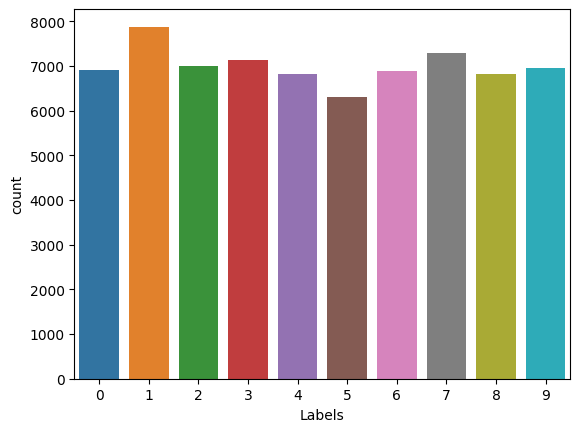

In [27]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**Penjelasan**

- Output yang dihasilkan adalah diagram batang yang menunjukkan sebaran jumlah setiap kelas atau digit dalam dataset. Masing-masing batang merepresentasikan jumlah kemunculan setiap digit.

- Pada sumbu x, memiliki label atau digit (0-9), dan pada sumbu y, memiliki jumlah kemunculan setiap digit dalam dataset.

- Plot ini membantu dalam memahami sebaran kelas dan memastikan bahwa dataset tidak memiliki ketidakseimbangan yang signifikan dalam jumlah sampel untuk setiap digit.

- Dalam kasus ini, setiap digit memiliki jumlah sampel yang relatif seimbang, yang merupakan kondisi yang baik untuk melatih model klasifikasi.

# **Load Kaggle A-Z**

In [28]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-04 15:24:02--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.1’

alfabeto_A-Z.zip.1  100%[===================>] 184.67M   128MB/s    in 1.4s    

2023-12-04 15:24:03 (128 MB/s) - ‘alfabeto_A-Z.zip.1’ saved [193643888/193643888]



In [29]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [30]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Penjelasan**

- Output yang ditampilkan adalah dataset A-Z Handwriting Data.csv. Data frame ini digunakan untuk melatih dan mengevaluasi model OCR CNN
- Dataset ini memiliki 372,450 baris dan 785 kolom, di mana kolom pertama adalah label dan kolom-kolom berikutnya (784 kolom) adalah nilai piksel dari gambar-gambar alfabet tulisan tangan yang terdiri dari A-Z.

In [9]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [10]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

Data piksel memiliki bentuk (372450, 784), sementara label memiliki bentuk (372450,).

In [11]:
# Check shape labels
alphabet_labels.shape

(372450,)

**Penjelasan**

Data label memiliki bentuk (372450,).

In [12]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

**Penjelasan**

data digit memiliki 372.450 baris, 28 kolom, dan 28 baris. Baris mewakili setiap gambar digit, sedangkan kolom mewakili setiap piksel pada gambar tersebut.

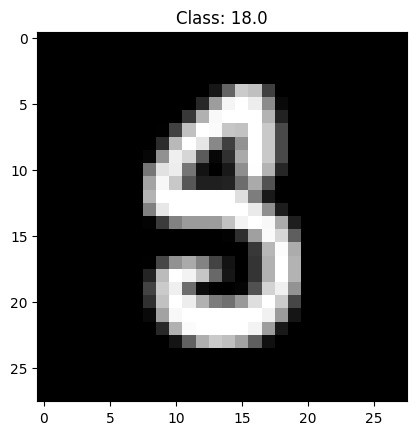

In [13]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

**Penjelasan**

Kode tersebut digunakan untuk secara acak memeriksa data digit yang telah disiapkan. Fungsi np.random.randint() digunakan untuk menghasilkan bilangan bulat acak antara 0 dan jumlah baris data digit. Bilangan bulat ini kemudian digunakan untuk memilih salah satu digit dari data digit.

Setelah digit dipilih, fungsi plt.imshow() digunakan untuk menampilkan digit tersebut sebagai gambar. Fungsi plt.title() digunakan untuk menambahkan judul pada gambar yang berisi kelas dari digit tersebut.

<Axes: xlabel='Labels', ylabel='count'>

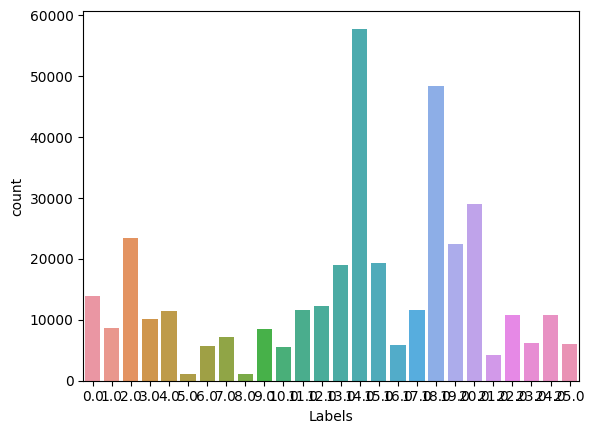

In [16]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**Penjelasan**

Kode tersebut digunakan untuk memplot distribusi kelas dari data digit. Fungsi sns.countplot() digunakan untuk membuat plot batang yang menunjukkan jumlah data untuk setiap kelas.

- Sumbu x menunjukkan kelas digit.
- Sumbu y menunjukkan jumlah data untuk setiap kelas.
- Tinggi setiap batang menunjukkan jumlah data untuk kelas tersebut.

# **Combine Dataset (MNIST + Kaggel A-Z)**

In [31]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Penjelasan**

Kode tersebut digunakan untuk memeriksa nilai unik dari label data digit. Fungsi np.unique() digunakan untuk mengembalikan nilai unik dari sebuah array.

Artinya, label data digit hanya memiliki 10 nilai unik, yaitu 0, 1, 2, 3, 4, 5, 6, 7, 8, dan 9.

In [32]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

**Penjelasan**

Output yang dihasilkan berupa array dengan nilai unik dari label alfabet, yaitu 0.0, 1.0, 2.0, ..., 25.0. Dtype (dtype=float32) menunjukkan bahwa tipe data label ini adalah float32. Setelah penambahan (alphabet_labels += 10), nilai uniknya menjadi 10.0, 11.0, 12.0, ..., 35.0.

In [33]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [34]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

Setelah penambahan (alphabet_labels += 10), nilai unik dari label pada dataset alfabet menjadi array [10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.]. Dtype (dtype=float32) menunjukkan bahwa tipe data label ini adalah float32.

In [35]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [36]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

- Output (442450, 28, 28) menunjukkan bahwa data sekarang memiliki 442,450 sampel, masing-masing dengan dimensi gambar 28x28 piksel.
- Output (442450,) menunjukkan bahwa terdapat 442,450 label yang sesuai dengan setiap sampel data. Jumlah label sama dengan jumlah sampel data, menunjukkan bahwa setiap sampel memiliki label yang sesuai.

In [37]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

Output yang dihasilkan adalah array bertipe data float32

In [38]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [39]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

Output (442450, 28, 28, 1) menunjukkan bahwa data sekarang memiliki 442,450 sampel, masing-masing dengan dimensi gambar 28x28 piksel, dan satu saluran warna (karena ada dimensi kedalaman/depth sebesar 1). Data ini sudah siap untuk digunakan dalam pelatihan model Convolutional Neural Network (CNN).

# **Preprocessing**

In [40]:
# Normalize data
data /= 255.0

In [41]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [42]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

**Penjelasan**

Menggunakan LabelBinarizer untuk mengkodekan label menjadi bentuk biner (one-hot encoding). Hasilnya adalah array dengan bentuk (442450, 36) karena sekarang terdapat 36 label yang mewakili digit 0-9 dan huruf A-Z.

In [43]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

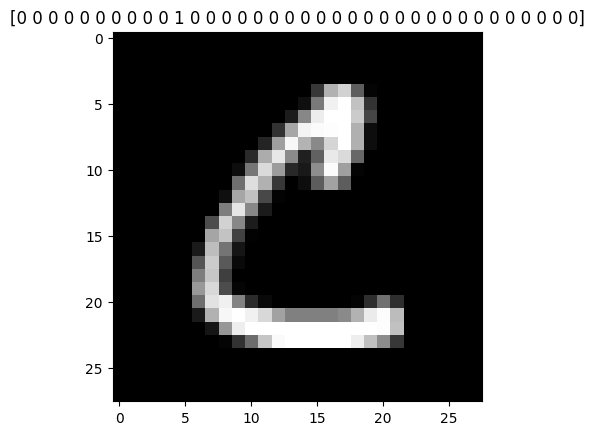

In [44]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

Penjelasan

Kode tersebut digunakan untuk menampilkan gambar digit dari data digit yang telah diubah bentuk menjadi 28x28 piksel. Fungsi plt.imshow() digunakan untuk menampilkan gambar, sedangkan fungsi plt.title() digunakan untuk menambahkan judul pada gambar yang berisi kelas dari digit tersebut.

Kode diatas akan menampilkan label biner yang sesuai dengan sampel tersebut. Outputnya adalah Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'). Label ini menunjukkan bahwa digit atau huruf yang mewakili sampel tersebut adalah 10, yang sesuai dengan huruf 'A' dalam alfabet.

In [45]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

Menghitung total data untuk setiap label menggunakan fungsi sum pada axis 0, menghasilkan array yang berisi jumlah data untuk setiap label.

In [46]:
# Check the biggest value of data
classes_total.max()

57825

Dari kode diatas, didapatkan nilai tertinggi dari jumlah data yaitu 57825

In [47]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Penjelasan**

Membuat dictionary classes_weights yang berisi bobot untuk setiap label. Bobot dihitung sebagai hasil pembagian nilai tertinggi jumlah data dengan jumlah data untuk setiap label. classes_weights menunjukkan bobot untuk setiap label setelah dihitung. Bobot ini akan digunakan dalam pelatihan model untuk menangani ketidakseimbangan data.

# **Split Data to Train and Test**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

# **Create Data Augmentation**

In [49]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# **Build CNN Model**

In [51]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [52]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

**Penjelasan**

Kode tersebut digunakan untuk membangun jaringan saraf tiruan (neural network) untuk pengenalan digit. Jaringan saraf tiruan ini menggunakan arsitektur convolutional neural network (CNN).

jaringan saraf tiruan yang dibangun terdiri dari beberapa lapisan, yaitu:

- Lapisan input (input layer) menerima data input, yaitu gambar digit.
- Lapisan convolutional (convolutional layer) menyaring gambar untuk mengekstrak fitur-fitur penting.
- Lapisan pooling (pooling layer) mengurangi ukuran gambar tanpa kehilangan informasi penting.
- Lapisan flatten (flatten layer) mengubah gambar menjadi vektor.
- Lapisan fully connected (fully connected layer) menghubungkan semua neuron dalam - lapisan sebelumnya.
- Lapisan output (output layer) menghasilkan keluaran, yaitu kelas digit.

In [53]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# **Train model**

In [54]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

Dalam kode ini, model disimpan dengan nama 'custom_ocr.model'. Jumlah epoch ditetapkan sebanyak 20, dan ukuran batch untuk pelatihan adalah 128.

In [55]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

Membuat objek ModelCheckpoint untuk menyimpan model setiap kali terjadi perbaikan (monitor='val_loss') pada nilai validasi (save_best_only=True).

In [66]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.3326 - accuracy: 0.8164
Epoch 1: val_loss improved from inf to 0.27048, saving model to custom_ocr.model
2765/2765 [==============================] - 466s 168ms/step - loss: 2.3326 - accuracy: 0.8164 - val_loss: 0.2705 - val_accuracy: 0.8857
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0316 - accuracy: 0.8979
Epoch 2: val_loss improved from 0.27048 to 0.23836, saving model to custom_ocr.model
2765/2765 [==============================] - 466s 169ms/step - loss: 1.0316 - accuracy: 0.8979 - val_loss: 0.2384 - val_accuracy: 0.9093
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8558 - accuracy: 0.9108
Epoch 3: val_loss improved from 0.23836 to 0.17349, saving model to custom_ocr.model
2765/2765 [==============================] - 449s 162ms/step - loss: 0.8558 - accuracy: 0.9108 - val_loss: 0.1735 - val_accuracy: 0.9345
Epoch 4/20
2765/2765 [======================

**Penjelasan**

- augmentation mungkin merujuk pada suatu metode augmentasi data untuk memperbanyak variasi data pelatihan.
- X_train dan y_train adalah data pelatihan dan labelnya.
- X_test dan y_test adalah data pengujian dan labelnya.
steps_per_epoch dihitung sebagai panjang data pelatihan dibagi dengan ukuran batch.
- class_weight mungkin digunakan untuk menangani ketidakseimbangan kelas.
- callbacks=[checkpointer] digunakan untuk menyimpan model terbaik selama pelatihan.

Dari hasil running, terdapat beberapa informasi penting untuk setiap epoch:

- loss: Nilai fungsi kerugian pada data pelatihan.
- accuracy: Akurasi pada data pelatihan.
- val_loss: Nilai fungsi kerugian pada data validasi.
- val_accuracy: Akurasi pada data validasi.
- informasi tambahan seperti waktu yang diambil untuk setiap epoch.

## **Evaluate Model**

#### **Make a Single Prediction**

In [56]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 25s 36ms/step


menunjukkan bahwa model telah membuat prediksi pada data pengujian (X_test). Proses ini menghasilkan predictions yang merupakan hasil prediksi model untuk setiap sampel dalam data pengujian.

Jumlah sampel yang diproses adalah 692, dan masing-masing prediksi dapat berupa nilai probabilitas untuk setiap kelas atau label yang ada dalam tugas klasifikasi.

In [67]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([0.02808159, 0.02793704, 0.02750123, 0.02774428, 0.02869424,
       0.02893927, 0.02675846, 0.02967853, 0.02984903, 0.02747175,
       0.02730906, 0.02705374, 0.02760337, 0.02833745, 0.02805854,
       0.02761851, 0.02811916, 0.02869198, 0.02768797, 0.02775826,
       0.02720176, 0.02789496, 0.02744313, 0.02645954, 0.02768848,
       0.02755563, 0.02697626, 0.02716565, 0.02705989, 0.02782031,
       0.02929774, 0.02708491, 0.02900945, 0.02725819, 0.02611686,
       0.02707373], dtype=float32)

**Penjelasan**

menunjukkan array probabilitas untuk setiap kelas atau label yang mungkin dalam tugas klasifikasi. Setiap elemen array mewakili probabilitas bahwa data pengujian tersebut termasuk dalam kelas tertentu.

In [68]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

8

**Penjelasan**

menunjukkan bahwa indeks dengan nilai tertinggi dalam array probabilitas adalah 18. Ini mengindikasikan bahwa model memprediksi bahwa sampel tersebut termasuk dalam kelas atau label dengan indeks 18.

In [69]:
# Check label for 24
name_labels[18]

'I'

**Penjelasan**

menunjukkan bahwa label atau nama yang terkait dengan kelas atau indeks 18 dalam tugas klasifikasi ini adalah 'I'.

In [70]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Penjelasan**

menunjukkan bahwa label atau target sebenarnya untuk sampel tertentu dalam data pengujian adalah array biner di mana hanya satu elemen bernilai 1, yaitu pada indeks 18 (indeks dimulai dari 0).

In [71]:
# check the highest value
np.argmax(y_test[1])

18

**Penjelasan**

menunjukkan bahwa indeks yang memiliki nilai tertinggi (1) dalam array y_test[1] adalah 18

In [72]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

**Penjelasan**

menunjukkan bahwa label atau nama yang terkait dengan kelas atau indeks yang memiliki nilai 1 dalam array y_test[18] adalah 'S'

**Make an Evaluation on Test Data**

In [73]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 29s 10ms/step - loss: 0.1609 - accuracy: 0.9442


[0.1608990579843521, 0.9442422986030579]

**Penjelasan**

menunjukkan performa model pada data pengujian. Dua nilai yang dihasilkan adalah nilai fungsi kerugian (loss) dan akurasi.

Dalam konteks ini:

Loss: 0.1395
Akurasi: 95.27%

In [74]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1381
           1       0.00      0.00      0.00      1575
           2       0.00      0.00      0.00      1398
           3       0.00      0.00      0.00      1428
           4       0.00      0.00      0.00      1365
           5       0.01      0.00      0.00      1263
           6       0.00      0.00      0.00      1375
           7       0.00      0.00      0.00      1459
           8       0.02      0.90      0.03      1365
           9       0.00      0.00      0.00      1392
           A       0.00      0.00      0.00      2774
           B       0.00      0.00      0.00      1734
           C       0.00      0.00      0.00      4682
           D       0.00      0.00      0.00      2027
           E       0.00      0.00      0.00      2288
           F       0.00      0.00      0.00       233
           G       0.00      0.00      0.00      1152
           H       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Penjelasan**

classification_report memberikan evaluasi kinerja model secara rinci dengan berbagai metrik seperti precision, recall, dan f1-score untuk setiap kelas.

Berikut adalah beberapa poin penting dari laporan tersebut:

- Precision: Kemampuan model untuk tidak mengklasifikasikan sampel yang sebenarnya negatif sebagai positif. Dalam konteks ini, Precision yang tinggi menunjukkan bahwa ketika model mengklasifikasikan sesuatu sebagai suatu kelas, itu cenderung benar.
- Recall: Kemampuan model untuk mengidentifikasi semua sampel positif. Recall yang tinggi menunjukkan bahwa model mampu mendeteksi sebagian besar sampel yang sebenarnya positif.
- F1-score: Harmonic mean dari precision dan recall. F1-score yang tinggi menunjukkan keseimbangan antara precision dan recall.
Ketiga metrik tersebut diukur untuk setiap kelas yang terdaftar di laporan tersebut. Selain itu, laporan mencakup nilai rata-rata untuk precision, recall, dan f1-score di seluruh kelas, yang disebut sebagai "macro avg," "weighted avg," dan "accuracy."

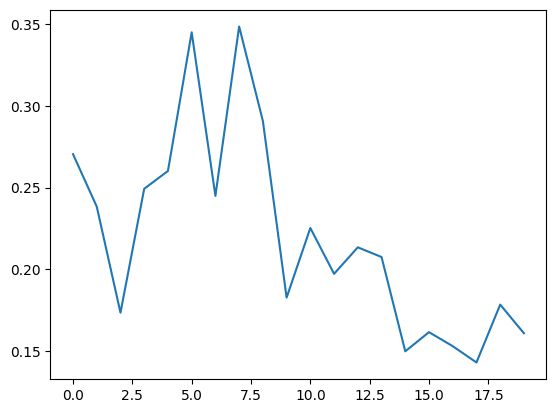

In [75]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

Plot tersebut memberikan gambaran tentang bagaimana loss model pada data validasi berubah selama proses pelatihan

In [76]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
mendapatkan kumpulan kunci (keys) yang tersedia dalam objek history.history. Dalam konteks pelatihan model neural network, kunci-kunci umumnya adalah sebagai berikut:

- 'loss': Nilai loss pada data pelatihan pada setiap epoch.
- 'accuracy': Akurasi pada data pelatihan pada setiap epoch.
- 'val_loss': Nilai loss pada data validasi pada setiap epoch.
- 'val_accuracy': Akurasi pada data validasi pada setiap epoch.

Dengan informasi ini, Anda dapat memanfaatkannya untuk membuat plot perubahan loss dan akurasi selama pelatihan model

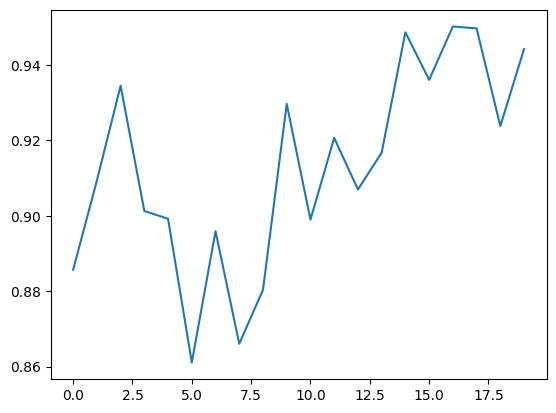

In [77]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# **Save The Model**

In [78]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing on Real Image**

In [81]:
# Import library
from tensorflow.keras.models import load_model

In [82]:
# Load saved network
load_network = load_model('network')

In [83]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

melihat lapisan-lapisan yang digunakan, bentuk output dari setiap lapisan, serta jumlah parameter yang dapat diatur (trainable params) dan jumlah total parameter.

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


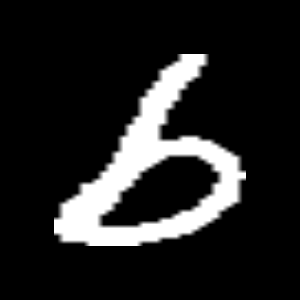

In [89]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/SEMESTER5/ML/kuis2/b_small.png')
cv2_imshow(img)

In [90]:
# Check shape
img.shape

(300, 300, 3)

In [91]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

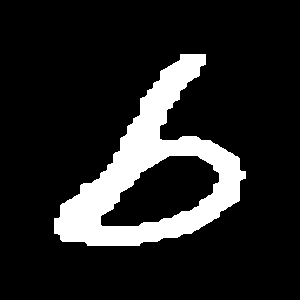

120.0


In [92]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [93]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [94]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [95]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [96]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 84ms/step


6

In [97]:
# check label for 6
name_labels[6]

'6'